## Importing Libraries

In [1]:
import os
import cv2
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import tensorflow as tf
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from skimage.color import rgb2lab
from keras.models import Sequential
from sklearn.decomposition import PCA
from skimage.measure import regionprops
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from skimage.feature import graycomatrix, graycoprops
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, classification_report
tf.compat.v1.disable_eager_execution()
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"


2023-07-31 19:16:59.259987: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-31 19:16:59.409752: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-31 19:17:00.100972: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Pickle Save

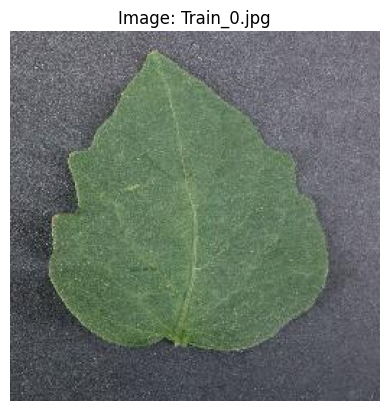

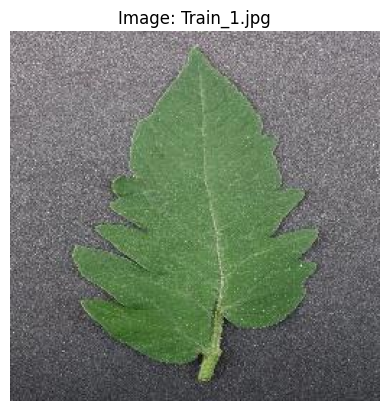

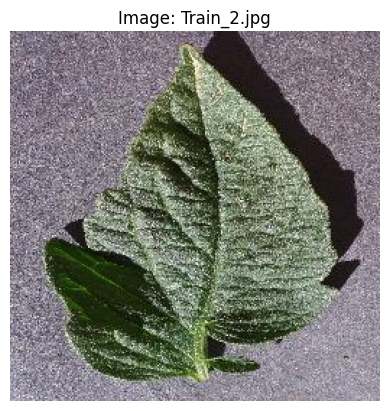

In [2]:
Image_dir='images'
img_size=224
data=[]
data1 = os.listdir(Image_dir)
df=pd.read_csv('train.csv')
# Sort the file names based on Test and Train categories and then numerically
data1.sort(key=lambda x: (x.startswith('Test'), int(x.split("_")[1].split(".")[0])))
label=[]
for i in range(7301):
    label.append(np.array(df.iloc[i:i+1,1:]))
num_images_to_display = 3
for filename in data1[:num_images_to_display]:
    image_path = os.path.join(Image_dir, filename)
    img = Image.open(image_path)
    img_array = np.array(img)
    
    # If the image is grayscale, convert it to RGB for display
    if len(img_array.shape) == 2:
        img_array = np.stack((img_array,)*3, axis=-1)
    
    plt.imshow(img_array)
    plt.title(f"Image: {filename}")
    plt.axis('off')  # Turn off axis ticks and labels
    plt.show()
    

In [3]:
for i in range(7301):
    
    img_path=os.path.join(Image_dir,data1[i])
    img_arr = Image.open(img_path)

    #img_arr=cv2.imread(img_path)
    #img_arr = img_arr.convert("L")

    img_arr= np.array(img_arr)

    img_arr=cv2.resize(img_arr,(img_size,img_size))
    data.append([img_arr,label[i]])

In [4]:
img_data= data[7300][0]

In [5]:
labes_str = str(data[7300][1])

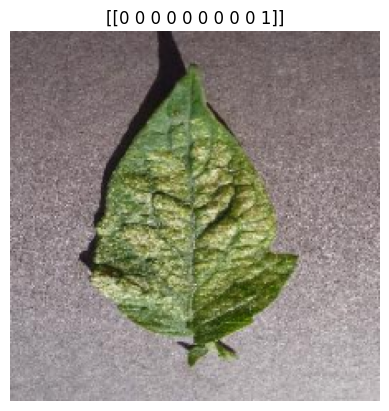

In [6]:
img_to_display = img_data

plt.imshow(img_to_display)
plt.title(labes_str)
plt.axis('off')  # Turn off axis ticks and labels
plt.show()

In [7]:
x=[]
y=[]
for features, label in data:
    x.append(features)
    y.append(label)

In [8]:
pickle.dump(x,open('X.pk1','wb'))
pickle.dump(y,open('Y.pk1','wb'))

## CNN feature extraction

In [9]:
x=pickle.load(open('X.pk1','rb'))
y=pickle.load(open('Y.pk1','rb'))

In [10]:
X = np.array(x)
Y = np.array(y)

# Normalize the data
X = X.astype('float32')
X /= 255.0

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 128)     

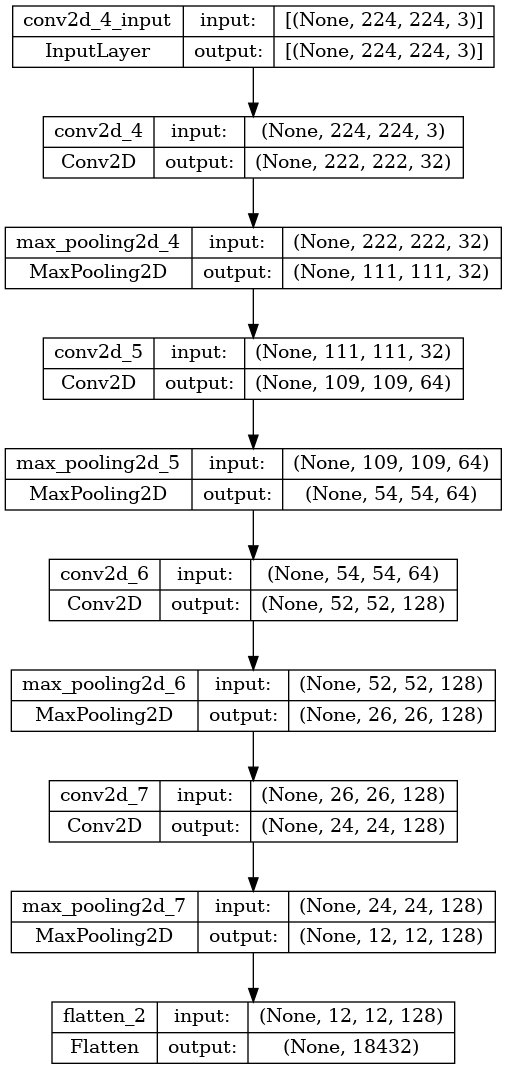

In [48]:
# Define your custom CNN architecture for feature extraction
def build_custom_cnn():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    return model

# Load your image dataset here (assuming you have loaded images into X_train)
#X_train = np.random.rand(7301, 224, 224, 3)

# Build your custom CNN model
custom_cnn_model = build_custom_cnn()

# Print a summary of the model architecture
custom_cnn_model.summary()
plot_model(custom_cnn_model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# Extract features from images using the custom CNN model

In [12]:
features = custom_cnn_model.predict(X, verbose=1)
np.save('extracted_features_custom_cnn.npy', features)

/home/usamah/anaconda3/envs/researchFussion/lib/python3.11/site-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-07-31 19:17:13.831243: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-07-31 19:17:13.831279: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: pop-os
2023-07-31 19:17:13.831285: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: pop-os
2023-07-31 19:17:13.831472: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 535.86.5
2023-07-31 19:17:13.831489: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel report

In [13]:
features.shape

(7301, 18432)

feature plotted in 2D

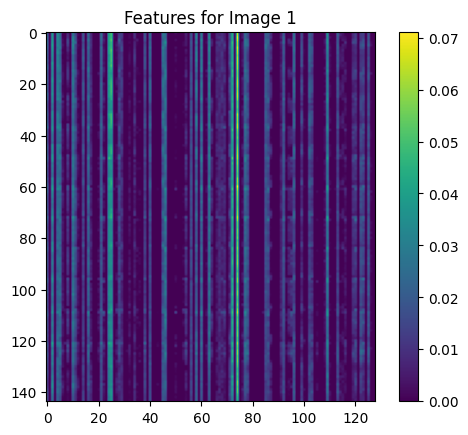

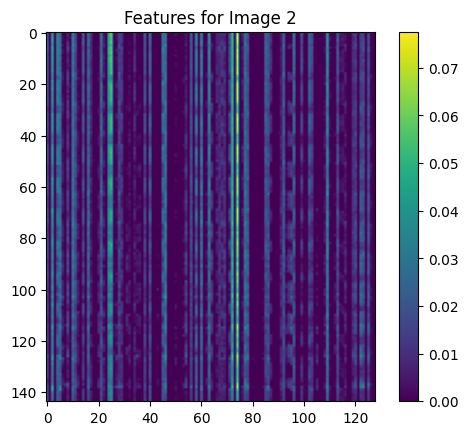

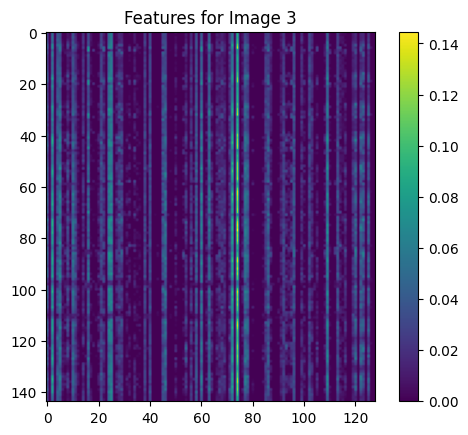

In [14]:
num_features_to_display = 3
for i in range(num_features_to_display):
    feature_2d = features[i].reshape(144, 128)  # Reshape the feature to 2D if possible
    plt.imshow(feature_2d, cmap='viridis')
    plt.title(f"Features for Image {i + 1}")
    plt.colorbar()
    plt.show()

feature plotted in 3D

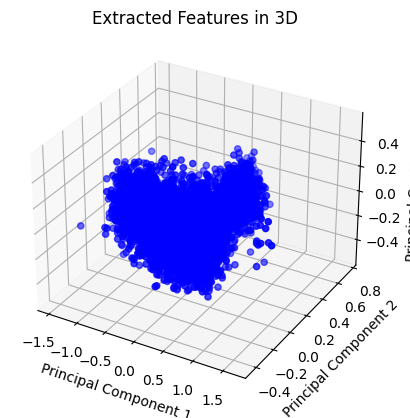

In [15]:
num_components = 3
pca = PCA(n_components=num_components)
reduced_features = pca.fit_transform(features)

# Display the reduced features in a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], c='b', marker='o')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('Extracted Features in 3D')
plt.show()

## Feature extraction and fusion

In [16]:
Image_dir='images'
img_size=224
data=[]
data1 = os.listdir(Image_dir)
df=pd.read_csv('train.csv')
# Sort the file names based on Test and Train categories and then numerically
data1.sort(key=lambda x: (x.startswith('Test'), int(x.split("_")[1].split(".")[0])))
label=[]
for i in range(7301):
    label.append(np.array(df.iloc[i:i+1,1:]))

In [17]:
preprocessed_images = []

In [18]:
for i in range(7301):
    
    img_path=os.path.join(Image_dir,data1[i])
    image = cv2.imread(img_path)
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    lab_image = rgb2lab(blurred_image)
    IL, Ia, Ib = lab_image[:, :, 0], lab_image[:, :, 1], lab_image[:, :, 2]

    # Calculate mean values of IL, Ia, and Ib
    mean_IL = np.mean(IL)
    mean_Ia = np.mean(Ia)
    mean_Ib = np.mean(Ib)

    # Thresholding
    IThL = np.where(IL >= mean_IL, 1, 0)
    ITha = np.where(Ia >= mean_Ia, 1, 0)
    IThb = np.where(Ib >= mean_Ib, 1, 0)
    Ibin = np.bitwise_or(IThL, np.bitwise_or(ITha, IThb)).astype(np.uint8)

    # Apply Median Filter (adjust the kernel size as needed)
    median_filtered_image = cv2.medianBlur(Ibin, 5)

    # Estimate bounding box to get ROI
    contours, _ = cv2.findContours(median_filtered_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    x, y, w, h = cv2.boundingRect(contours[0])
    x2, y2 = x + w, y + h
    roi_image = image[y:y2, x:x2]
    roi_lab = lab_image[y:y2, x:x2]

    # Save or process the ROI image and its corresponding channels as needed
    # For example, you can save the images or extract additional handcrafted features

    # Append the preprocessed image to the list
    preprocessed_images.append(roi_image)

In [19]:
def compute_color_features(roi_lab):
    # Calculate mean and standard deviation of the a and b channels
    mean_a = np.mean(roi_lab[:, :, 1])
    mean_b = np.mean(roi_lab[:, :, 2])
    std_a = np.std(roi_lab[:, :, 1])
    std_b = np.std(roi_lab[:, :, 2])

    # Concatenate the color features into a single vector
    color_features = [mean_a, mean_b, std_a, std_b]
    return color_features

In [20]:
def compute_texture_features(roi_gray):
    # Compute co-occurrence matrix
    distances = [1]  # Specify the distance between pixel pairs
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # Specify the angles for pixel pairs
    glcm = graycomatrix(roi_gray, distances=distances, angles=angles, symmetric=True, normed=True)

    # Compute texture features using co-occurrence matrix
    contrast = graycoprops(glcm, prop='contrast').ravel()[0]
    dissimilarity = graycoprops(glcm, prop='dissimilarity').ravel()[0]
    homogeneity = graycoprops(glcm, prop='homogeneity').ravel()[0]
    energy = graycoprops(glcm, prop='energy').ravel()[0]
    correlation = graycoprops(glcm, prop='correlation').ravel()[0]

    # Concatenate the texture features into a single vector
    texture_features = [contrast, dissimilarity, homogeneity, energy, correlation]
    return texture_features

In [21]:
handcrafted_features_list = []

In [22]:
for roi_image in preprocessed_images:
    # Convert the ROI image to grayscale
    roi_gray = cv2.cvtColor(roi_image, cv2.COLOR_BGR2GRAY)

    # Compute region properties for area and perimeter
    region_props = regionprops(roi_gray)

    # Calculate area and perimeter
    area = region_props[0].area
    perimeter = region_props[0].perimeter

    # Calculate circularity using area and perimeter
    circularity = 4 * np.pi * area / (perimeter ** 2)

    # Calculate diameter using area
    diameter = np.sqrt(4 * area / np.pi)

    # Calculate eccentricity using region properties
    eccentricity = region_props[0].eccentricity

    # Calculate asymmetry as the difference between the image and its reflection along the vertical axis
    asymmetry = np.sum(np.abs(roi_gray - np.flipud(roi_gray))) / (2 * np.sum(roi_gray))

    # Compute color features from CIELab channels
    roi_lab = cv2.cvtColor(roi_image, cv2.COLOR_BGR2Lab)
    color_features = compute_color_features(roi_lab)

    # Compute texture features from grayscale image
    texture_features = compute_texture_features(roi_gray)

    # Concatenate all the computed features into a single vector
    handcrafted_features = [area, perimeter, circularity, diameter, eccentricity, asymmetry] + color_features + texture_features

    # Append the computed features to the list
    handcrafted_features_list.append(handcrafted_features)

# Convert the list of handcrafted features into a numpy array
handcrafted_features_array = np.array(handcrafted_features_list)

/tmp/ipykernel_24873/2162123958.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  circularity = 4 * np.pi * area / (perimeter ** 2)


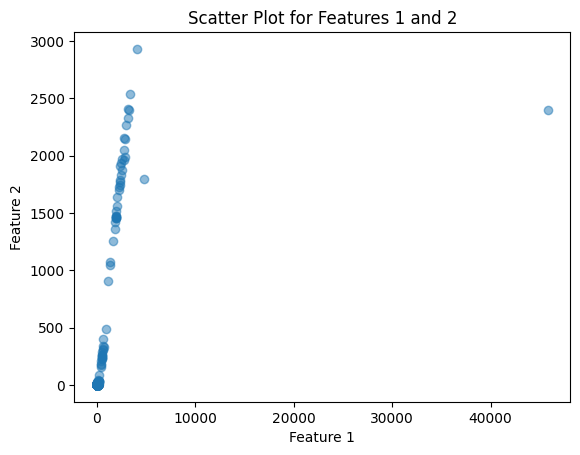

In [23]:
feature_0_idx = 0
feature_1_idx = 1

plt.scatter(handcrafted_features_array[:, feature_0_idx], handcrafted_features_array[:, feature_1_idx], alpha=0.5)
plt.xlabel(f'Feature {feature_0_idx + 1}')
plt.ylabel(f'Feature {feature_1_idx + 1}')
plt.title(f'Scatter Plot for Features {feature_0_idx + 1} and {feature_1_idx + 1}')
plt.show()

In [24]:
handcrafted_features_array.shape

(7301, 15)

In [25]:
handcrafted_features_array[3]

array([3.00000000e+00, 0.00000000e+00,            inf, 1.95441005e+00,
       9.94322506e-01, 4.97463391e-01, 1.22726013e+02, 1.34143570e+02,
       1.22586405e+01, 1.49139112e+01, 1.14570839e+03, 2.54582108e+01,
       5.90705397e-02, 1.16259905e-02, 6.39323422e-01])

In [26]:
features = np.load('extracted_features_custom_cnn.npy')

In [27]:
features.shape

(7301, 18432)

In [28]:
max_value = 1e6  # Set the maximum value for clipping
handcrafted_features_array[np.isinf(handcrafted_features_array)] = max_value
handcrafted_features_array[handcrafted_features_array > max_value] = max_value


In [29]:
scaler = StandardScaler()
scaled_handcrafted_features = scaler.fit_transform(handcrafted_features_array)

In [30]:
scaled_cnn_features = scaler.fit_transform(features)

In [31]:
fused_features = np.hstack((scaled_handcrafted_features, scaled_cnn_features))


In [32]:
fused_features.shape

(7301, 18447)

In [33]:
np.save('fused_features.npy', fused_features)

## Model

In [34]:
y=pickle.load(open('Y.pk1','rb'))
#Y = np.array(y)
labels = np.argmax(y, axis=2).flatten()

In [35]:
num_classes = len(labels)
features = np.load('fused_features.npy')

In [36]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [37]:
classifier = LogisticRegression(max_iter=1000)

In [38]:
classifier.fit(X_train, y_train)

/home/usamah/anaconda3/envs/researchFussion/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [39]:
y_pred = classifier.predict(X_test)

# Calculate accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8678986995208761


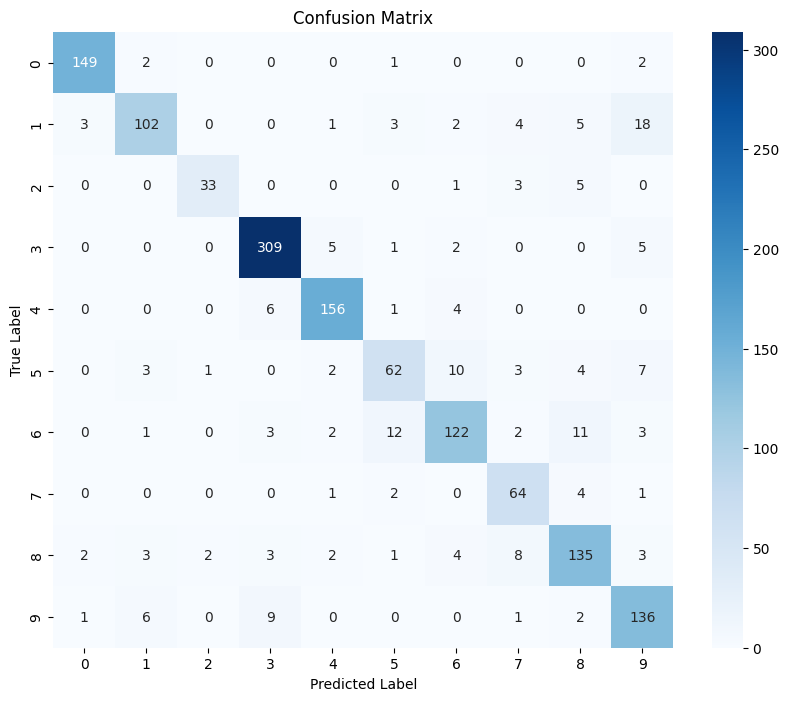

In [40]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(labels), yticklabels=np.unique(labels))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [41]:
svm_classifier = SVC(kernel='linear', C=1.0)

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Get a detailed classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.8747433264887063
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       154
           1       0.86      0.78      0.82       138
           2       0.85      0.81      0.83        42
           3       0.93      0.97      0.95       322
           4       0.95      0.92      0.94       167
           5       0.69      0.66      0.68        92
           6       0.85      0.79      0.82       156
           7       0.79      0.85      0.82        72
           8       0.85      0.83      0.84       163
           9       0.81      0.89      0.85       155

    accuracy                           0.87      1461
   macro avg       0.85      0.85      0.85      1461
weighted avg       0.87      0.87      0.87      1461



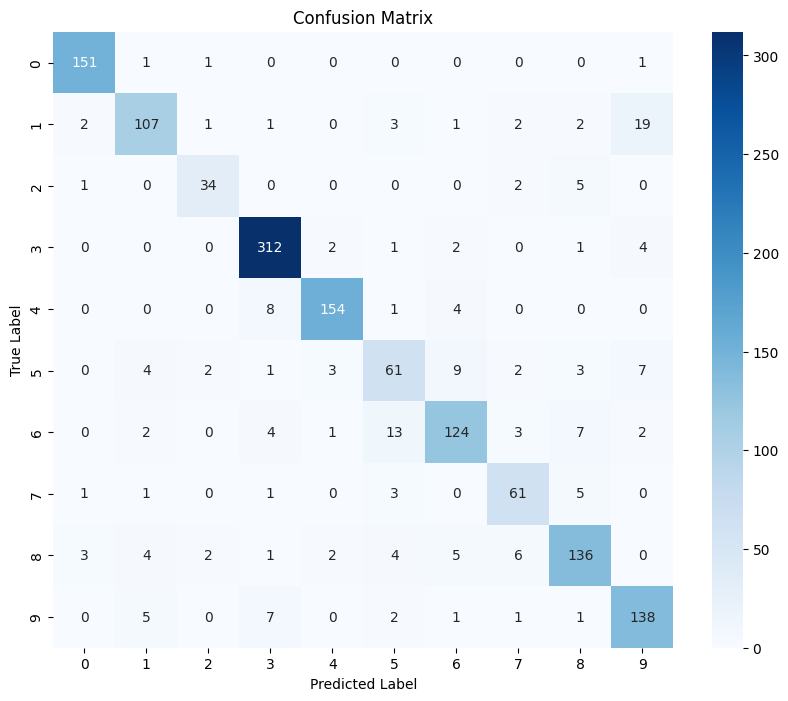

In [42]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(labels), yticklabels=np.unique(labels))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 18447)             0         
                                                                 
 dense (Dense)               (None, 256)               4722688   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 7301)              941829    
                                                                 
Total params: 5,697,413
Trainable params: 5,697,413
Non-trainable params: 0
_________________________________________________________________


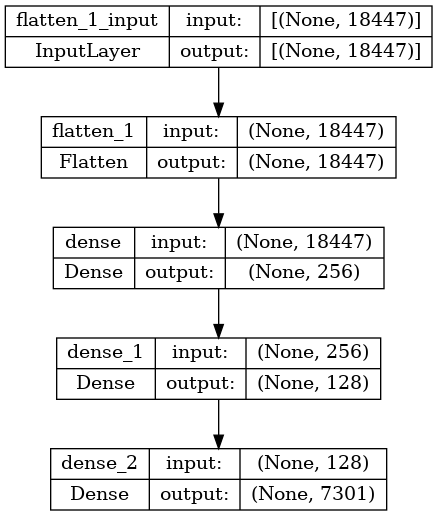

In [43]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Create a neural network model
model = Sequential()

# Flatten the input features
model.add(Flatten(input_shape=(features.shape[1:])))

# Add hidden layers
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

# Add the output layer with softmax activation for multiclass classification
num_classes = len(labels)
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

In [44]:
# Train the model on the training data
batch_size = 32
epochs = 10
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


Train on 5256 samples, validate on 584 samples


2023-07-31 19:32:59.975186: W tensorflow/c/c_api.cc:300] Operation '{name:'training/Adam/dense_2/bias/v/Assign' id:403 op device:{requested: '', assigned: ''} def:{{{node training/Adam/dense_2/bias/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training/Adam/dense_2/bias/v, training/Adam/dense_2/bias/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch 1/10
5256/5256 [==============================] - 4s 721us/sample - loss: 1.0302 - accuracy: 0.7253 - val_loss: 0.4546 - val_accuracy: 0.8476
Epoch 2/10
 128/5256 [..............................] - ETA: 3s - loss: 0.1841 - accuracy: 0.9375

/home/usamah/anaconda3/envs/researchFussion/lib/python3.11/site-packages/keras/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2023-07-31 19:33:04.025807: W tensorflow/c/c_api.cc:300] Operation '{name:'loss/mul' id:249 op device:{requested: '', assigned: ''} def:{{{node loss/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss/mul/x, loss/dense_2_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


5256/5256 [==============================] - 4s 668us/sample - loss: 0.2366 - accuracy: 0.9210 - val_loss: 0.6074 - val_accuracy: 0.8185
Epoch 3/10
5256/5256 [==============================] - 4s 680us/sample - loss: 0.0903 - accuracy: 0.9696 - val_loss: 0.4789 - val_accuracy: 0.8545
Epoch 4/10
5256/5256 [==============================] - 4s 705us/sample - loss: 0.0571 - accuracy: 0.9821 - val_loss: 0.5384 - val_accuracy: 0.8493
Epoch 5/10
5256/5256 [==============================] - 4s 763us/sample - loss: 0.1237 - accuracy: 0.9633 - val_loss: 0.7681 - val_accuracy: 0.8339
Epoch 6/10
5256/5256 [==============================] - 4s 737us/sample - loss: 0.1248 - accuracy: 0.9612 - val_loss: 0.8453 - val_accuracy: 0.8339
Epoch 7/10
5256/5256 [==============================] - 4s 707us/sample - loss: 0.0672 - accuracy: 0.9819 - val_loss: 1.1117 - val_accuracy: 0.7945
Epoch 8/10
5256/5256 [==============================] - 4s 701us/sample - loss: 0.0709 - accuracy: 0.9787 - val_loss: 0.706

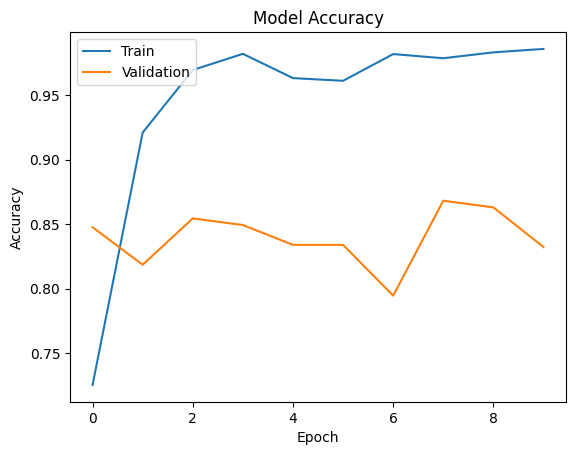

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


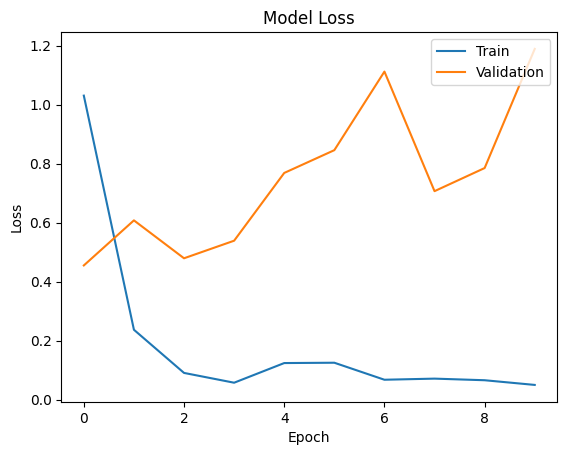

In [46]:

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

/home/usamah/anaconda3/envs/researchFussion/lib/python3.11/site-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-07-31 19:33:37.932910: W tensorflow/c/c_api.cc:300] Operation '{name:'dense_2/Softmax' id:191 op device:{requested: '', assigned: ''} def:{{{node dense_2/Softmax}} = Softmax[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_2/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


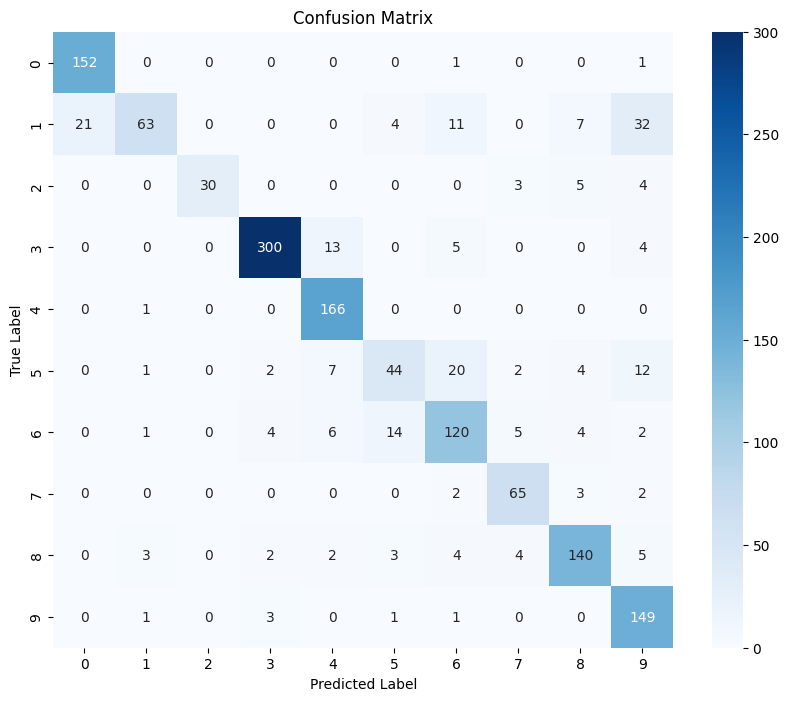

In [47]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(labels), yticklabels=np.unique(labels))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()